In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pandas as pd
import numpy as np

import matplotlib as mpl
from scipy.stats import ttest_ind

In [2]:
res_df = pd.read_pickle('./results/runtime_scalability_results/runtime_benchmark.pkl')

In [5]:
methods = ['Spateo_GPU', 'Spateo_GPU_sparse', 'PASTE_GPU', 'PASTE2_CPU', 'PASTE2_CPU_nonfix', 'Moscot_GPU',  'SLAT_GPU','STAlign_GPU', 'SPACEL_CPU']
my_palette = [np.array([157,60,135]) / 255] + [np.array([202,178,214]) / 255] + sns.color_palette('Paired')[0:2]+sns.color_palette('Paired')[1:2]+sns.color_palette('Paired')[2:3]+sns.color_palette('Paired')[4:5]+sns.color_palette('Paired')[6:7]+sns.color_palette('Paired')[11:12]

In [7]:
res_df['dot_line'] = False
res_df.loc[res_df['method'] == 'PASTE2_CPU_nonfix', 'dot_line'] = True


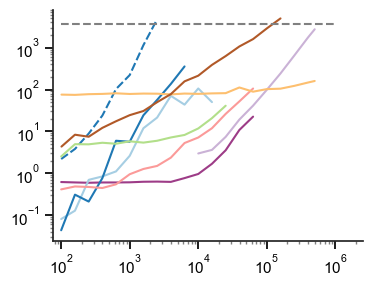

In [9]:
import matplotlib as mpl
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR})

fig, ax = plt.subplots(1,1,figsize=(4,3))
g = sns.lineplot(
    data=res_df,
    x='subsample_num', 
    y="runtime", 
    hue="method", 
    palette=my_palette,
    err_kws={'edgecolor': None},
    legend=False,
    ax=ax,
    hue_order=methods,
    style='dot_line',
)

ax.set_yscale('log')
ax.set_xscale('log')

# ax.set_xlabel('Cells in source and target', color='black')
# ax.set_ylabel('Runtime/s', color='black')

ax.set_xlabel('', color='black')
ax.set_ylabel('', color='black')
ax.set_title('')
sns.despine(top=True, right=True)
plt.tick_params(which='minor', length=2.5, color='gray')  # Small ticks lighter
ax.plot([1e2, 1e6], [3600, 3600], '--', lw=1.5, color='gray')
ax.set_xlim(7.5e1, 2.5e6)
ax.set_ylim(None, 8000)
# plt.savefig('./figures/runtime_scalability_benchmark/runtime_benchmark.pdf', dpi=300, bbox_inches='tight', transparent=True)

# Memory usage

In [35]:
res_df_mem = pd.read_pickle('./results/runtime_scalability_results/memory_benchmark.pkl')

In [36]:
methods = ['Spateo_GPU', 'Spateo_GPU_sparse', 'PASTE_GPU', 'PASTE2_CPU_mem', 'PASTE2_CPU_nonfix_mem', 'Moscot_CPU_mem', 'SLAT_GPU','STAlign_GPU', 'SPACEL_CPU_mem']
my_palette = [np.array([157,60,135]) / 255] + [np.array([202,178,214]) / 255] + sns.color_palette('Paired')[0:2]+sns.color_palette('Paired')[1:2]+sns.color_palette('Paired')[2:3]+sns.color_palette('Paired')[4:5]+sns.color_palette('Paired')[6:7]+sns.color_palette('Paired')[11:12]

In [37]:
res_df_mem['dot_line'] = False
res_df_mem.loc[res_df_mem['method'] == 'PASTE2_CPU_nonfix_mem', 'dot_line'] = True

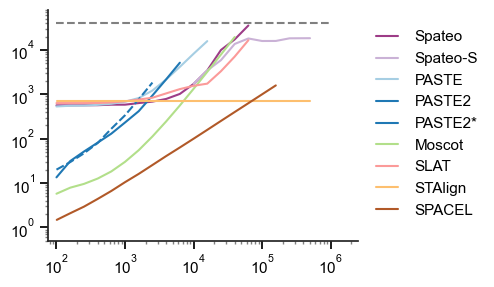

In [39]:
import matplotlib as mpl
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR})

fig, ax = plt.subplots(1,1,figsize=(4,3))
g = sns.lineplot(
    data=res_df_mem,
    x='subsample_num', 
    y="memory", 
    hue="method", 
    palette=my_palette,
    err_kws={'edgecolor': None},
    legend=True,
    ax=ax,
    hue_order=methods,
    style='dot_line',
)

handles, labels = ax.get_legend_handles_labels()
labels = ['Spateo','Spateo-S', 'PASTE','PASTE2','PASTE2*','Moscot','SLAT','STAlign', 'SPACEL']
ax.get_legend().remove()
fig.legend(handles[1:], labels, ncol=1, loc='center left', 
                bbox_to_anchor=(0.9, 0.5), frameon=False, columnspacing=0.5,numpoints=10)

ax.set_yscale('log')
ax.set_xscale('log')

# ax.set_xlabel('Cells in source and target', color='black')
# ax.set_ylabel('Memory/MB', color='black')
ax.set_xlabel('', color='black')
ax.set_ylabel('', color='black')
ax.set_title('')
sns.despine(top=True, right=True)
plt.tick_params(which='minor', length=2.5, color='gray')  # Small ticks lighter
ax.plot([1e2, 1e6], [40960, 40960], '--', lw=1.5, color='gray')
ax.set_ylim(0.5, 80000)
ax.set_xlim(7.5e1, 2.5e6)
# plt.savefig('./figures/runtime_scalability_benchmark/memory_benchmark.pdf', dpi=300, bbox_inches='tight', transparent=True)